# פרופיל לקוח - מודל סיווג ותובנות

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


### טעינת נתוני הטרנזקציה של הלקוח

In [36]:
df = pd.read_excel("transaction_data.xlsx")
df_2 = pd.read_excel("transaction_data_2.xlsx")
df_profile = df[['תאריך חיוב', 'שם בית העסק', 'סכום עסקה', 'סכום חיוב', 'מס\' תשלומים', 'תשלום מס']].copy()
df_profile_2 = df_2[['תאריך חיוב', 'שם בית העסק', 'סכום עסקה', 'סכום חיוב', 'מס\' תשלומים', 'תשלום מס']].copy()

df_profile

,תאריך חיוב,שם בית העסק,סכום עסקה,סכום חיוב,מס' תשלומים,תשלום מס
0,2018-06-01,סופר פארם,186.78,186.78,1,1
1,2018-06-01,זארה,389.00,389.00,1,1
2,2019-04-02,קפה מונטיפיורי,73.00,73.00,1,1
3,2018-09-02,דואלי מכונות אוטומטיות,6.40,6.40,1,1
4,2018-10-02,זארה,190.00,190.00,1,1
5,2018-12-02,בלונז'רי 96,108.08,108.08,1,1
6,2018-09-03,מקס סטוק,35.00,35.00,1,1
7,2018-10-03,סוסו ובניו,38.00,38.00,1,1
8,2019-01-04,הוט,130.00,130.00,1,1
9,2019-02-04,ניצת הדובדבן,18.49,18.49,1,1


## נריץ מודל סיווג למציאת קטגוריה מתאימה לכל טרנזקציה

In [37]:
df_profile['קבוצה'] = df[['קבוצה']].copy()
df_profile_2['קבוצה'] = df_2[['קבוצה']].copy()

df_profile

,תאריך חיוב,שם בית העסק,סכום עסקה,סכום חיוב,מס' תשלומים,תשלום מס,קבוצה
0,2018-06-01,סופר פארם,186.78,186.78,1,1,טיפוח ואסתיקה
1,2018-06-01,זארה,389.00,389.00,1,1,אופנה
2,2019-04-02,קפה מונטיפיורי,73.00,73.00,1,1,מסעדות ומזון מהיר
3,2018-09-02,דואלי מכונות אוטומטיות,6.40,6.40,1,1,שונות
4,2018-10-02,זארה,190.00,190.00,1,1,אופנה
5,2018-12-02,בלונז'רי 96,108.08,108.08,1,1,מסעדות ומזון מהיר
6,2018-09-03,מקס סטוק,35.00,35.00,1,1,כלי בית ומבטח
7,2018-10-03,סוסו ובניו,38.00,38.00,1,1,מסעדות ומזון מהיר
8,2019-01-04,הוט,130.00,130.00,1,1,הוצאות דירה שוטפות
9,2019-02-04,ניצת הדובדבן,18.49,18.49,1,1,בריאות וכושר


In [38]:
df_profile.to_excel('transaction_data.xlsx')

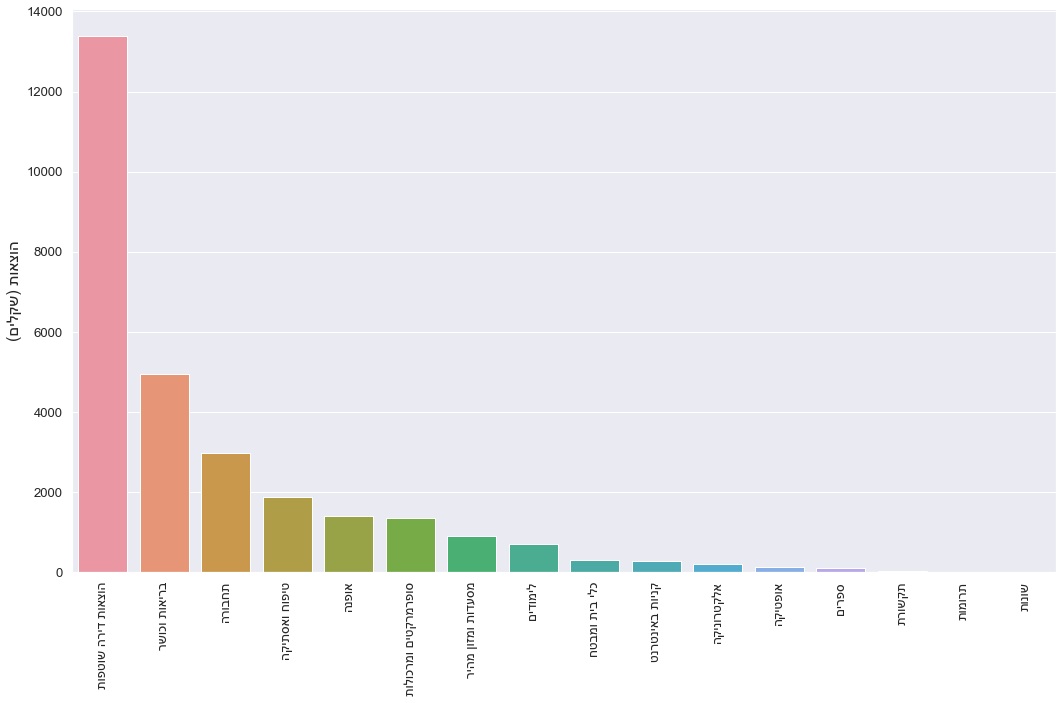

In [39]:
from bidi.algorithm import get_display
import matplotlib.pyplot as plt

n_category = df_profile.groupby("קבוצה")['סכום חיוב'].sum().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.2) 

plt.figure(figsize=(15,10))

bar = sns.barplot(x=n_category['קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

bar.set_xticklabels(bar.get_xticklabels(), rotation=90)

plt.ylabel(get_display('הוצאות (שקלים)'), fontdict={'fontsize':16})
plt.xlabel(get_display(''), fontdict={'fontsize':20})
plt.tight_layout()

### המודל יודע לסווג כל טרנזקציה לקטגוריה מתאימה ולהבין על מה הלקוח מוציא הכי הרבה כסף

### תובנות:
#### - ניתן לראות מהגרף שהלקוח מוציא הרבה כסף על בילויים וטיפוח
#### - אין לו הוצאות על גנים/בתי ספר לפיכך כבר בשלב הזה ניתן להבין שללקוח אין ילדים
#### - קיימות הוצאות על דירה
#### - קיימות הוצאות על תחבורה 

## נריץ מודל נוסף שמטרתו להוציא מידע נוסף על הלקוח

In [20]:
df_profile['תת קבוצה'] = df[['תת קבוצה']].copy()
df_profile_2['תת קבוצה'] = df_2[['תת קבוצה']].copy()

df_profile

,תאריך חיוב,שם בית העסק,סכום עסקה,סכום חיוב,מס' תשלומים,תשלום מס,קבוצה,תת קבוצה
0,2018-06-01,סופר פארם,186.78,186.78,1,1,טיפוח ואסתיקה,טיפוח
1,2018-06-01,זארה,389.00,389.00,1,1,אופנה,ביגוד
2,2019-04-02,קפה מונטיפיורי,73.00,73.00,1,1,מסעדות ומזון מהיר,בתי קפה
3,2018-09-02,דואלי מכונות אוטומטיות,6.40,6.40,1,1,שונות,שונות
4,2018-10-02,זארה,190.00,190.00,1,1,אופנה,ביגוד
5,2018-12-02,בלונז'רי 96,108.08,108.08,1,1,מסעדות ומזון מהיר,בתי קפה
6,2018-09-03,מקס סטוק,35.00,35.00,1,1,כלי בית ומבטח,כלי בית ומבטח
7,2018-10-03,סוסו ובניו,38.00,38.00,1,1,מסעדות ומזון מהיר,מזון מהיר
8,2019-01-04,הוט,130.00,130.00,1,1,הוצאות דירה שוטפות,כבלים / אינטרנט
9,2019-02-04,ניצת הדובדבן,18.49,18.49,1,1,בריאות וכושר,בתי טבע


## נבחן את הוצאות על התחבורה לפי תתי קטגוריה - לקוח מספר 1

<Figure size 1080x720 with 0 Axes>

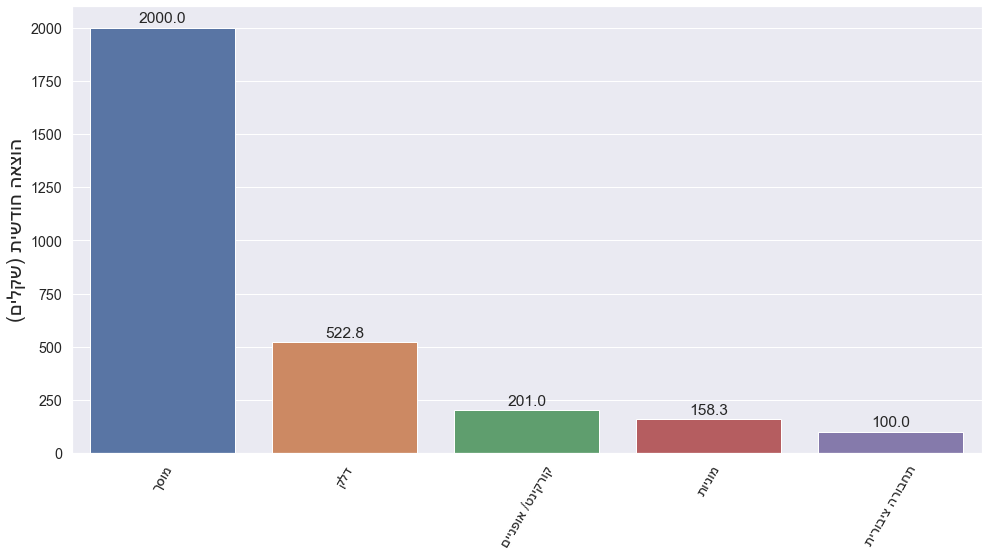

In [21]:
plt.figure(figsize=(15,10))


n_category = df_profile[df_profile['קבוצה'] == 'תחבורה'].groupby("תת קבוצה")['סכום חיוב'].sum().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.3) 

plt.figure(figsize=(14,8))

bar = sns.barplot(x=n_category['תת קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

plt.ylabel(get_display('הוצאה חודשית (שקלים)'), fontdict={'fontsize':20})
plt.xlabel(get_display(''), fontdict={'fontsize':20})


plt.tight_layout()


### ניתן לראות שללקוח יש רכב בגלל שיש הוצאות על דלק, בנוסף יש הוצאות על מוסך לפיכך אפשר להניח שללקוח יש רכב ישן - הבנק יכול להציע ללקוח הלוואה לרכב חדש ולחסוך לו את ההוצאות על מוסכים

## נבחן לקוח מספר 2

<Figure size 1080x720 with 0 Axes>

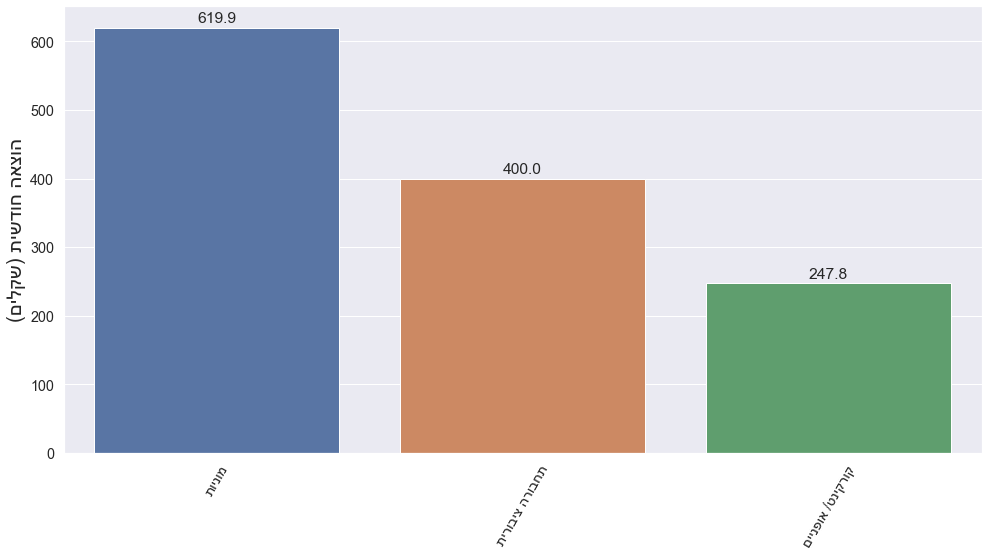

In [22]:
plt.figure(figsize=(15,10))


n_category = df_profile_2[df_profile_2['קבוצה'] == 'תחבורה'].groupby("תת קבוצה")['סכום חיוב'].sum().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.3) 

plt.figure(figsize=(14,8))

bar = sns.barplot(x=n_category['תת קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

plt.ylabel(get_display('הוצאה חודשית (שקלים)'), fontdict={'fontsize':20})
plt.xlabel(get_display(''), fontdict={'fontsize':20})


plt.tight_layout()


### ניתן לראות שאין הוצאות על דלק אבל קיימות הוצאות גדולות על תחבורה ציבורית ומוניות לפיכך הבנק יכול להציע ללקוח לקחת הלוואה לקניית רכב ולחסוך לו את הכסף על התחבורה ציבורית ומוניות

## נבחן הוצאות על דירה לפי תתי קטגוריה - לקוח מספר 1

<Figure size 1080x720 with 0 Axes>

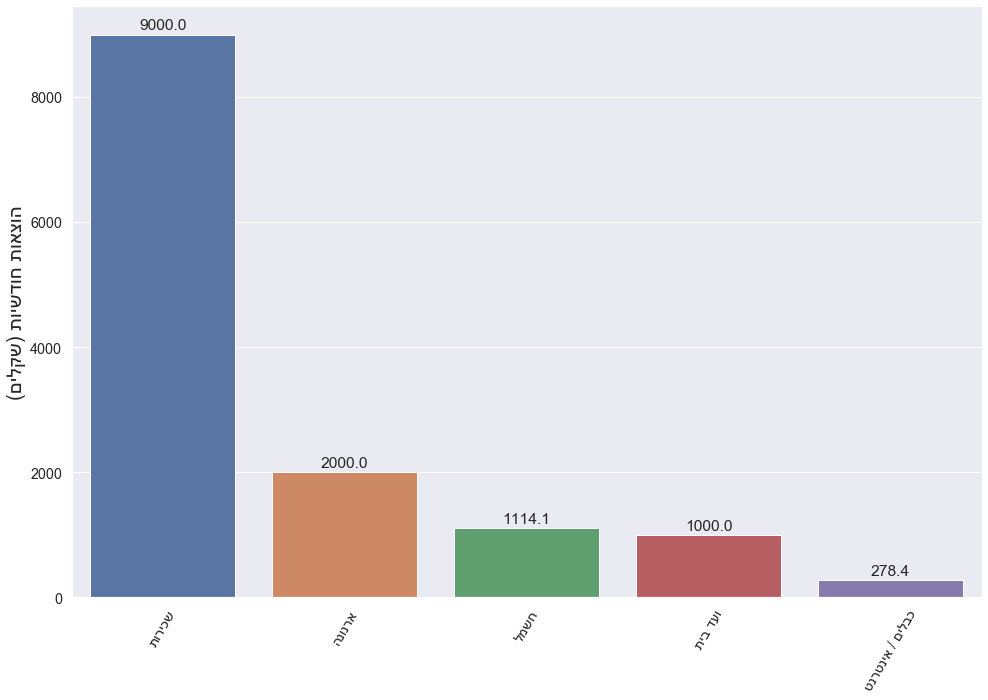

In [23]:
plt.figure(figsize=(15,10))



n_category = df_profile[df_profile['קבוצה'] == 'הוצאות דירה שוטפות'].groupby("תת קבוצה")['סכום חיוב'].sum().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.3) 

plt.figure(figsize=(14,10))

bar = sns.barplot(x=n_category['תת קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

plt.ylabel(get_display('הוצאות חודשיות (שקלים)'), fontdict={'fontsize':20})
plt.xlabel(get_display(''), fontdict={'fontsize':20})
plt.tight_layout()


### לפי ההוצאות הגבוהות על ועד בית ושכירות ניתן להניח שרמת חיים של הלקוח היא מעל הממוצע 

## נתבונן בהוצאות של שכר דירה ביחס שאר הלקוחות

In [32]:
data = pd.read_csv("datasets_531_1056_german_credit_data.csv")
data.head()

# data = data[data['Credit amount'] < 2000]
data = data[data['Credit amount'] > 1000]

Text(0.5, 0, 'הריד רכש לע תואצוה')

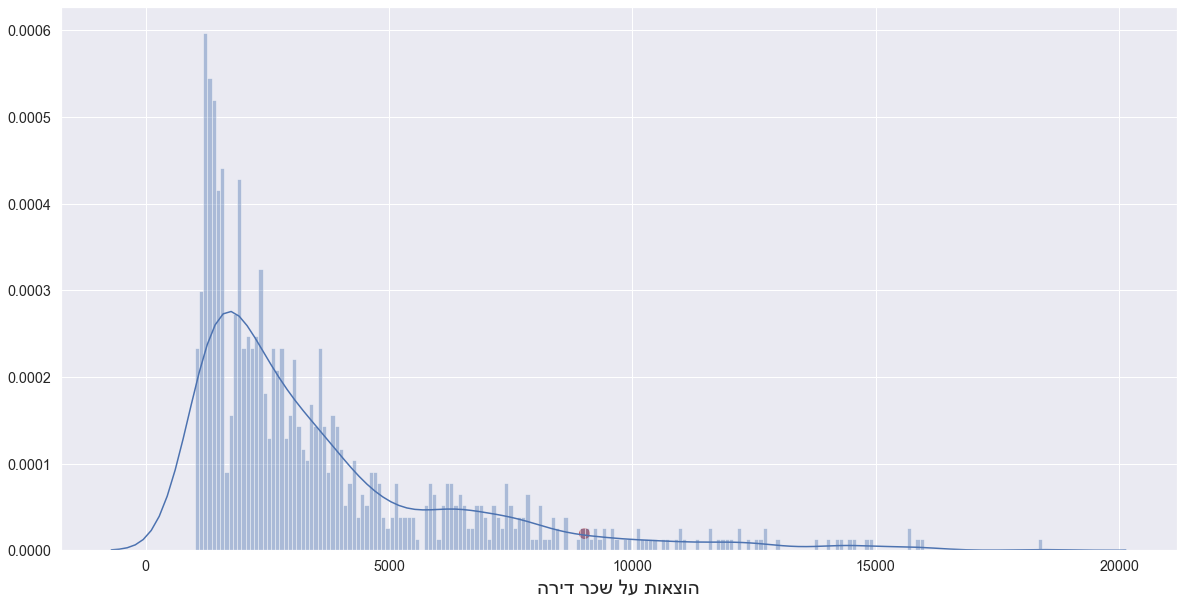

In [35]:
import numpy as np
tips = sns.load_dataset("tips")
plt.figure(figsize=(20,10))

ax = sns.distplot(data["Credit amount"], bins = 200)
sns.regplot(x=np.array([9000]), y=np.array([0.00002]), scatter=True, fit_reg=False, marker='o', color = 'r',
            scatter_kws={"s": 100})

# sns.regplot(x=np.array([522.8]), y=np.array([0.00028]), scatter=True, fit_reg=False, marker='o', color = 'g',
#             scatter_kws={"s": 100})

# plt.ylabel(get_display('הוצאות (שקלים)'), fontdict={'fontsize':20})
plt.xlabel(get_display('הוצאות על שכר דירה'), fontdict={'fontsize':20})

### ניתן לראות שההוצאות על שכר דירה של הלקוח לא בנורמה ביחס לשאר הלקוחות לפיכך הבנק יכול להציע ללקוח לקחת משכנתא 

## נבחן הוצאות על דירה לפי תתי קטגוריה - לקוח מספר 2

<Figure size 1080x720 with 0 Axes>

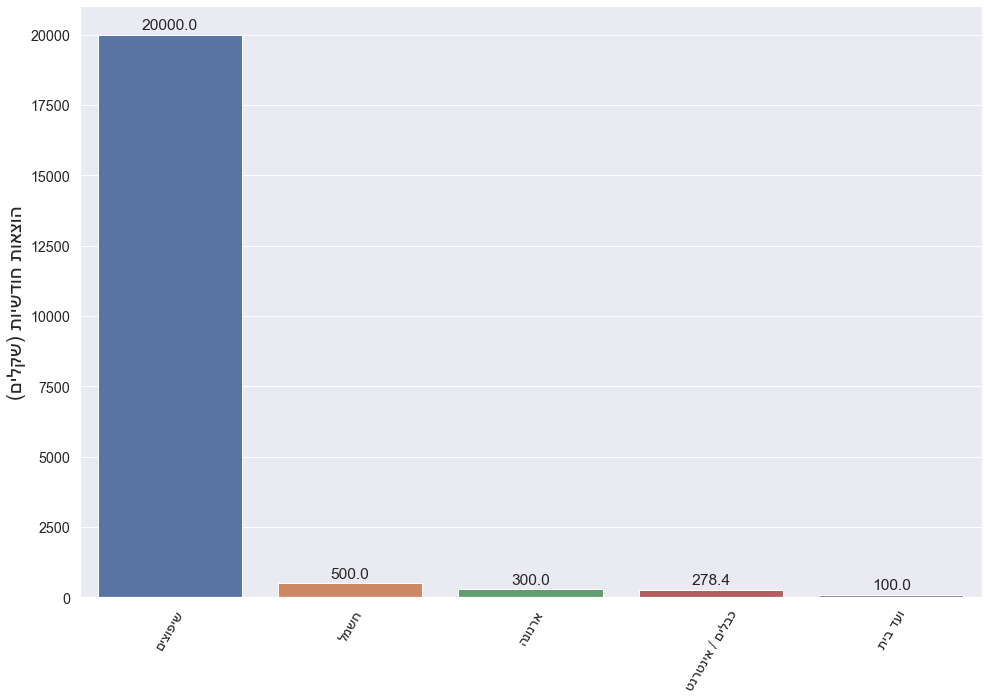

In [24]:
plt.figure(figsize=(15,10))



n_category = df_profile_2[df_profile_2['קבוצה'] == 'הוצאות דירה שוטפות'].groupby("תת קבוצה")['סכום חיוב'].sum().rename("Count").reset_index()

n_category.sort_values(by=["Count"], ascending=False, inplace=True)

sns.set(font_scale=1.3) 

plt.figure(figsize=(14,10))

bar = sns.barplot(x=n_category['תת קבוצה'].apply(lambda x: get_display(x)), y="Count",data=n_category)

for p in bar.patches:
    bar.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

bar.set_xticklabels(bar.get_xticklabels(), rotation=60)

plt.ylabel(get_display('הוצאות חודשיות (שקלים)'), fontdict={'fontsize':20})
plt.xlabel(get_display(''), fontdict={'fontsize':20})
plt.tight_layout()


### ניתן לראות שאין הוצאות על שכר דירה אבל יש הוצאות על ועד בית לפיכך ניתן להניח שללקוח מספר 2 יש דירה בבעלותו, בנוסף רואים שללקוח יש הוצאה גדולה על שיפוץ לפיכף הבנק יכול להציע ללקוח הלוואה לשיפוץ הדירה